# Homework 1 Data Mining by Lea Michels

In [1]:
#Importing Packages

import numpy as np
import pandas as pd
from scipy.spatial import distance
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

In [2]:
#loading the data
df_img=np.loadtxt('hw1_img.csv',delimiter=',',skiprows=1)
df_real=np.loadtxt('hw1_real.csv',delimiter=',',skiprows=1)
df_input=np.loadtxt('hw1_input.csv',delimiter=',',skiprows=1)

print("df_img shape:", df_img.shape)
print("df_real shape:", df_real.shape)

df_img shape: (385, 201)
df_real shape: (385, 201)


In [3]:
#Calculation of Euclidian Distance Matrix
distance_matrix = (df_img**2+df_real**2)**0.5
print(distance_matrix)
print('shape distance:',distance_matrix.shape)


[[0.78177808 0.78343957 0.78579497 ... 0.98871424 0.98873743 0.98875949]
 [0.98686002 0.98666888 0.98646997 ... 0.95018795 0.95081421 0.95141673]
 [0.8668833  0.86564303 0.86425769 ... 0.82336758 0.81414754 0.80375158]
 ...
 [0.98592488 0.98611357 0.98629353 ... 0.98720376 0.98707789 0.98694855]
 [0.98428174 0.98404853 0.98380733 ... 0.92138962 0.92261824 0.9238054 ]
 [0.71009064 0.70198076 0.69425706 ... 0.83333015 0.83514179 0.83689273]]
shape distance: (385, 201)


In [4]:
#Calculation of Korrelation Matrix
Correlation_Matrix=np.corrcoef(distance_matrix)
print(Correlation_Matrix)
print(Correlation_Matrix.shape)

[[ 1.         -0.44171533 -0.01929576 ...  0.70223026 -0.55046671
  -0.18489851]
 [-0.44171533  1.         -0.23851917 ... -0.61977865  0.90023709
   0.90453395]
 [-0.01929576 -0.23851917  1.         ... -0.2007356  -0.39511922
  -0.06688104]
 ...
 [ 0.70223026 -0.61977865 -0.2007356  ...  1.         -0.65345023
  -0.59630582]
 [-0.55046671  0.90023709 -0.39511922 ... -0.65345023  1.
   0.76335763]
 [-0.18489851  0.90453395 -0.06688104 ... -0.59630582  0.76335763
   1.        ]]
(385, 385)


# 3.1 Dimensionality Reduction with PCA:

to reduce the dimensions of the input data I perform I standardize the data and then identify the amount of components taht capture over 90% of the variance. In the next step I calculate the loadings of the identified principle components.

In [5]:
# Define the feature mapping dictionary
mapping_dict = {
    'Feature_1': 'length of patch',
    'Feature_2': 'width of patch',
    'Feature_3': 'height of patch',
    'Feature_4': 'height of substrate',
    'Feature_5': 'height of solder resist layer',
    'Feature_6': 'radius of the probe',
    'Feature_7': 'c_pad',
    'Feature_8': 'c_antipad',
    'Feature_9': 'c_probe',
    'Feature_10': 'dielectric constant of substrate',
    'Feature_11': 'dielectric constant of solder resist layer'
}

# Assuming df_input is defined, here’s the PCA process
# Step 1: Standardize the data
scaler = StandardScaler()
df_standardized = scaler.fit_transform(df_input)

# Step 2: Apply PCA
n_components = 10  # Set the number of principal components
pca = PCA(n_components=n_components)
pc_input = pca.fit_transform(df_standardized)

# Output PCA results
print("Principal Components:\n", pc_input)
print("\nExplained Variance per Component:\n", pca.explained_variance_ratio_)
print("Shape of Principal Components matrix:", pc_input.shape)

# Step 3: Extract loadings
# The loadings are the principal axes in feature space (components) transposed
loadings = pca.components_.T  

# Ensure df_input has named features
if isinstance(df_input, np.ndarray):
    # If df_input is an ndarray, convert it to DataFrame with generic feature names
    df_input = pd.DataFrame(df_input, columns=[f"Feature_{i+1}" for i in range(df_input.shape[1])])

# Create DataFrame for loadings and rename features using mapping_dict
loadings_df = pd.DataFrame(loadings, index=df_input.columns, columns=[f"PC{i+1}" for i in range(loadings.shape[1])])
loadings_df = loadings_df.rename(index=mapping_dict)

# Display the renamed loadings DataFrame
loadings_df



Principal Components:
 [[-0.98260156  1.0043847  -1.51627938 ... -0.66733997  0.53539094
   0.13473933]
 [ 0.24873998 -0.14189148  0.37619311 ... -2.04103073  0.65108507
   1.82566643]
 [ 1.90839519  0.08378653 -0.31951516 ... -1.24403257  0.53862556
   0.44709186]
 ...
 [-1.99260951 -0.25277077 -0.97504368 ... -0.28954966 -1.41917995
  -0.55402924]
 [-0.63735054  0.7575065   0.11371692 ... -1.08026541  0.28520377
  -0.38830857]
 [ 1.93407024  0.46432792  0.81013856 ... -0.06068914 -0.48191778
   0.25052159]]

Explained Variance per Component:
 [0.20715348 0.11070825 0.10003384 0.09607237 0.09187079 0.08845826
 0.08565904 0.08165053 0.07339863 0.05830268]
Shape of Principal Components matrix: (385, 10)


,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10
length of patch,-0.101327,0.315409,-0.369645,0.376883,0.409833,0.073314,-0.253331,0.454266,-0.406238,-0.036934
width of patch,0.624178,-0.009718,0.040766,0.039631,0.012169,-0.032326,0.000413,0.022090,-0.040157,-0.328516
height of patch,0.071054,0.055716,0.620460,0.392974,0.017701,0.069714,-0.490098,-0.317943,-0.216559,0.243013
height of substrate,0.624137,0.018824,0.016441,0.076518,0.028012,-0.060565,0.002837,0.059481,-0.038186,-0.305362
height of solder resist layer,-0.021049,0.266259,0.086417,0.510652,-0.124629,0.459841,0.647199,-0.110408,0.040184,-0.027430
radius of the probe,0.025997,0.002815,0.548381,-0.454397,0.218986,0.304908,0.212779,0.491478,-0.240280,0.080764
c_pad,-0.054228,-0.265990,0.144827,0.177533,0.580059,-0.547579,0.429976,-0.174386,-0.140321,0.049041
c_antipad,-0.018720,-0.559499,0.088323,0.373926,0.127759,0.172140,-0.138146,0.415883,0.548589,-0.000574
c_probe,0.039213,0.564753,0.093131,-0.151004,0.487544,0.016285,-0.102528,-0.129279,0.618694,0.000912
dielectric constant of substrate,0.445100,-0.012829,-0.256167,-0.022492,0.012254,0.027772,0.097290,0.053226,0.031927,0.849121


# Interpretation of the components:

We can reduce the the complexity of the design space by using princible componen analysis. The first eight components explain about 80% of the total variance, while ten components explain more then 90% of total variance which is most of the time the required explained aimed for in praxis.

# Principal Component 1: Antenna Dimensions and Conductivity
 PC1: Explains 20.7% of the overall Variance and is the most important component of this analysis. The most influential features here are
 the "width of patch" and the "height of substrate" with both having a loading of 0.62 as well as the "dielectric constant of substrate with
 a loading of 0.45. Therefore this component is explaining the fundamental interplay of patch dimensions, substrat dimensions and material attributes in the same direction.

# Principal Component 2:Patch and soldier resist layer dimensions vs. anti-pad-pad-probe radius difference and dielectric constant of soldier resist layer
 PC2 explains 11% of the overall Variance and shows the interplay of Pad, Probe, Antipad and Solder resist layer Positioning/Sizing. . This Component shows if the Antenna either has a larger patch length, probe position to patch ratio and larger heighth of soldier resist layer, or a larger anti-oad-oad radius difference, dielectric constant of solder resist layer and pad-probe radius difference.
 The most influential feature are the Probe position/patch lenght ratio which has a loading of 0.56 and the Anti-pad-pad radius difference with a negative loading of -0.56. Here also the length of patch has a significant loading in the same direction as theProbe position/patch length ratio with 0.315 and the height of solder resist layer with 0.26. the dielectric constant of solder resist layer has a loading of -0.35 and the pad-probe radius difference a loading of -0.26. 

# Principal Component 3: Pad to Probe vs. Pad and dielectric constants
 The third component explaines 10% of the overall variance. It indicatets that either in positive direction heigt of pad, radius of probe and the pad/probe difference  have a higher value or lenght of pad, the dielecgtric constant of the substrate and the dielectric constant of the soldier relist layer have a higher value.

# Principal Component 4: Patch, Pad and Resist layer Dimensions vs. Probe size and position 
#PC 4 explaines 10% of the variance and shows a positive direction for Langth/heights of patch, height pf solder resist layyer and c-antipad_pad probe. And a negative direction for raius of probe, probe position/patch size ratio as well as the dielectric constant of resistance layer.

# All other components have an eplained varience that is smaller than 10%. 

Therefore here is a list of the highets loadings for each PC.

Principal Component 5: length of patch 0.41, c_pad = 0.58, c_probe = 0.48
Principal Component 6: c_pad = -0.54, dielectric constant of solder resist layer = 0.59
Principal Component 7: height of patch = - 0.49, height of solder resist layer = 0.64
Principal Component 8: radius of the probe = 0.49, dielectric constant of solder resist layer = -0.46
Principal Component 9: c_probe = 0.61, length of patch = -0.41
Principal Component 10: dielectric constant of substrate = 0.85, width of patch = -0.32


Since I realized that we can not draw insights from the identified principle components to the relationship between geometry and electromagnetic bahaviour and a correlation between these seven components and the frequency measures of the 385 components I thought about an other way to identify the interplay of 
I also conducted a PCA with the Magnitudes and then calculated the correlation between those PC and the input data. 

In [6]:
#GPT: How to perform PCA with Numpy in python?`` 
 
# Step 1: Standardize the data
scaler = StandardScaler()
data_standardized = scaler.fit_transform(distance_matrix)

# Step 2: Apply PCA
pca = PCA(n_components=4)
principal_components = pca.fit_transform(data_standardized)

# Output results
print("Principal Components:\n", principal_components)
print("\nExplained Variance Ratio:\n", pca.explained_variance_ratio_)
principal_components

Principal Components:
 [[  7.56266672   2.78274765   0.84038624  -3.80047894]
 [  2.14635354  -6.49953693  -4.54795049  -0.9806068 ]
 [ -7.22787754  10.00049382  -6.72728362   3.2297572 ]
 ...
 [ 10.48089185   0.29281032   0.22084907  -0.226544  ]
 [  1.65841039  -6.87185128  -1.61587554  -1.02490285]
 [-12.26482715  -2.67133993  -4.20530312  -4.97575391]]

Explained Variance Ratio:
 [0.60013561 0.12227894 0.11380723 0.07500046]


array([[  7.56266672,   2.78274765,   0.84038624,  -3.80047894],
       [  2.14635354,  -6.49953693,  -4.54795049,  -0.9806068 ],
       [ -7.22787754,  10.00049382,  -6.72728362,   3.2297572 ],
       ...,
       [ 10.48089185,   0.29281032,   0.22084907,  -0.226544  ],
       [  1.65841039,  -6.87185128,  -1.61587554,  -1.02490285],
       [-12.26482715,  -2.67133993,  -4.20530312,  -4.97575391]])

These four pricipal components explain 90% of the total variance of the frequency measurements. Furthermore I then conducted a correlation analysis

In [7]:
#GPT:gibt es eine Möglichkeit innerhalb der PCA die verschiedenen 11 Design Eigenschaften auf meine PCA des Outputs zu Mappen um zu analysieren welche design Parameter einen Einfluss auf diese components haben?

# Load the design parameters (input_data) and the calculated magnitude data (S11 Output)
input_data = pd.read_csv('hw1_input.csv')  # Designparameter
real_s11 = pd.read_csv('hw1_real.csv')
imag_s11 = pd.read_csv('hw1_img.csv')

#Calculate the magnitudes
magnitude_s11 = np.sqrt(np.power(real_s11, 2) + np.power(imag_s11, 2))

# Standardize the magnitudes and perform PCA (4 principal components)
scaler = StandardScaler()
magnitude_scaled = scaler.fit_transform(magnitude_s11)
pca_magnitude = PCA(n_components=4)
pca_magnitude_components = pca_magnitude.fit_transform(magnitude_scaled)

# Create DataFrame for PCA components and input_data
pca_df = pd.DataFrame(pca_magnitude_components, columns=['PC1', 'PC2', 'PC3','PC4'])

# Calculate the correlation between the design parameters and the PCA components
correlations = input_data.corrwith(pca_df['PC1']).to_frame(name='PC1_corr')
correlations['PC2_corr'] = input_data.corrwith(pca_df['PC2'])
correlations['PC3_corr'] = input_data.corrwith(pca_df['PC3'])
correlations['PC4_corr'] = input_data.corrwith(pca_df['PC4'])

print("Correlation between design parameters and PCA components:\n", correlations) 

Correlation between design parameters and PCA components:
                                             PC1_corr  PC2_corr  PC3_corr  \
length of patch                             0.090296  0.076842  0.089372   
width of patch                             -0.908197 -0.030550 -0.104090   
height of patch                            -0.076652 -0.016331  0.010047   
height of substrate                        -0.947118 -0.042610 -0.086442   
height of solder resist layer              -0.002365  0.013754  0.007540   
radius of the probe                        -0.062912  0.025536  0.051885   
c_pad                                       0.057352  0.020950 -0.067132   
c_antipad                                   0.052712 -0.041817 -0.000398   
c_probe                                    -0.062925  0.082535  0.031536   
dielectric constant of substrate           -0.465894  0.173906 -0.056458   
dielectric constant of solder resist layer -0.030014 -0.014583 -0.062098   

                            

PC1: The first component explains 60% of the total variance in frequency measuremnts, beeing verry important. Shows that with of patch and height of substarte are higly negatively correlated with the first principle component of the PCA. ANd the dielecgtric constant of the substrate is highly positvi correlated with the first component.

PC2: PC2 explains a variance of 12% in frequency measurements and is positivleyy correlated with the dielectric constant

PC3: Pc3 explains 11% of the total variance in frequency measurements and is negatively correlated with the with of the patch. 


Though I do know that a

# 3.2 Regression 

3.2.1 I simplified the regression task by first searching for the minimum Magnitude for the Antennes that has to be at at least 0.316 or less since this is the required standard for antannas to be ablied in real life scenarios. 
Then I plottet where each antenna reached its minimum and selected the frequencies where at least 3 antennas reached there minimum. 
Those Frequencies I selected to conduct the Regression with the real parts and imaginary parts separately. I also conducted a regression for the magnitudes.

In [8]:
# Calculation of the magnitude of the S11 values ​​at all 201 frequency points
magnitude_s11 = np.sqrt(np.power(real_s11, 2) + np.power(imag_s11, 2))
magnitude_df = pd.DataFrame(magnitude_s11)

dF antennas with a magnitude < 0.316: 161
            0         1         2         3         4         5         6  \
2    0.866883  0.865643  0.864258  0.862724  0.861039  0.859198  0.857199   
6    0.903162  0.901380  0.899557  0.897693  0.895787  0.893839  0.891850   
7    0.867850  0.864974  0.862034  0.859029  0.855959  0.852823  0.849619   
10   0.904232  0.901785  0.899296  0.896765  0.894190  0.891571  0.888907   
14   0.993849  0.993806  0.993762  0.993719  0.993675  0.993630  0.993585   
..        ...       ...       ...       ...       ...       ...       ...   
372  0.993267  0.993219  0.993171  0.993123  0.993073  0.993023  0.992973   
373  0.933913  0.932777  0.931637  0.930494  0.929348  0.928197  0.927043   
374  0.993995  0.993934  0.993872  0.993810  0.993748  0.993685  0.993622   
378  0.820582  0.816544  0.812337  0.807954  0.803388  0.798634  0.793684   
380  0.712967  0.703130  0.692989  0.682545  0.671797  0.660746  0.649395   

            7         8         9

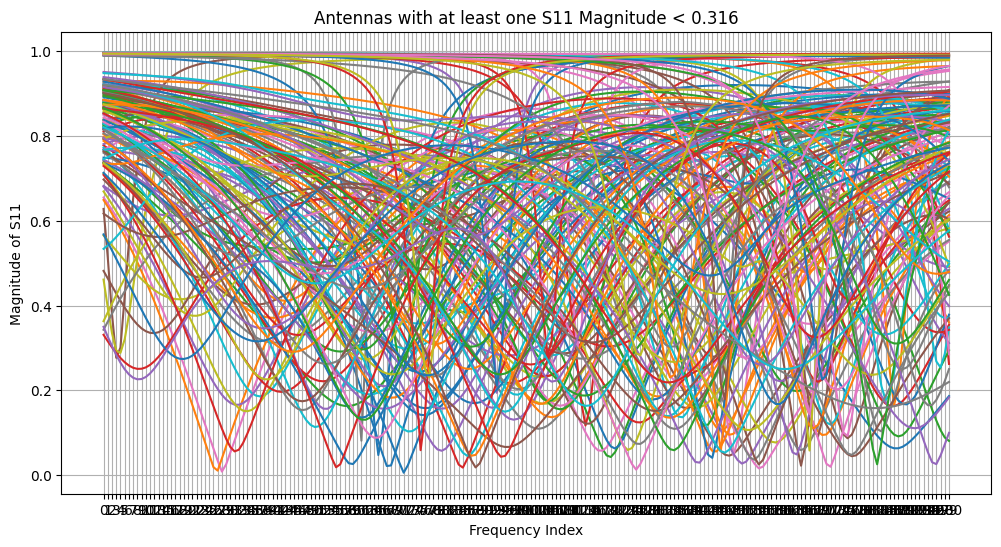

In [9]:
# Minimum Magnitude for Antennas is -10dB which is equivalent to Magnitude < 0.316 Source: https://www.jees.kr/upload/pdf/jees-2022-3-r-90.pdf
#GPT: Please write the code to plot the magnitude of the Antennas that reach their minimum al o.316 or lower

filtered_antennas = magnitude_df[magnitude_df.lt(0.316).any(axis=1)]

# Show the number of filtered antennas and their values
print(f"dF antennas with a magnitude < 0.316: {len(filtered_antennas)}")
print(filtered_antennas)

# Plot for magnitude values ​​below the limit (0.316)
plt.figure(figsize=(12, 6))

# frequency indices for the x-axis
frequency_indices = magnitude_df.columns

# Loop over the filtered antennas and plot their magnitudesn
for i in range(len(filtered_antennas)):
   plt.plot(frequency_indices, filtered_antennas.iloc[i], label=f'Antenna {i+1}')


plt.xlabel('Frequency Index')
plt.ylabel('Magnitude of S11')
plt.title('Antennas with at least one S11 Magnitude < 0.316')
#plt.legend()
plt.grid(True)
plt.show()

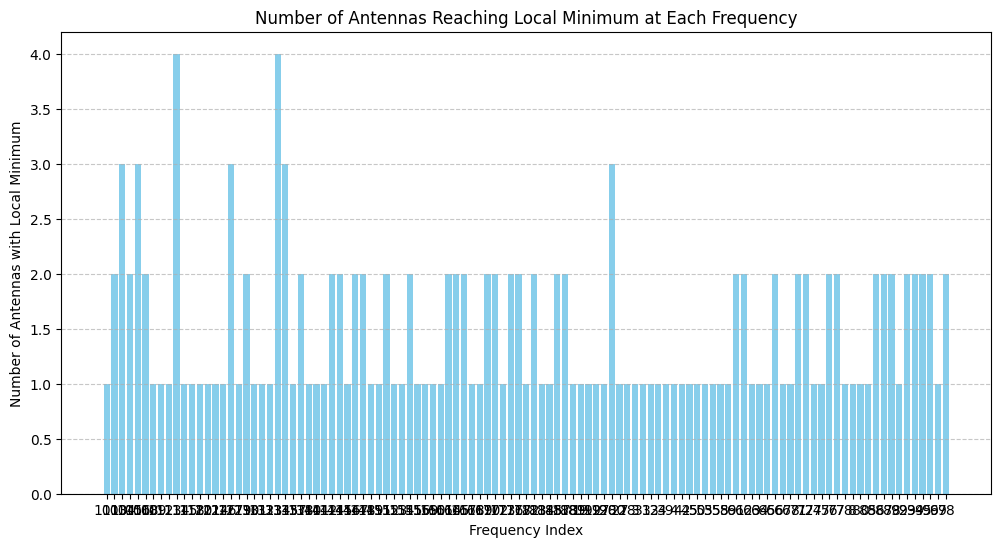

In [10]:
#Plotting the Bar chart of the local minimas 

#GPT Promt: Can you now create the code for a bar chart. The x axis should show the frequencies and the y axis should show the number of antennas that have reached their local minimum at this frequency. To do this, use the filtered antennas data set that we have just created. Dnake

# Calculate the minimum for each antenna in the filtered data
min_indices = filtered_antennas.idxmin(axis=1)

# Count how often each frequency index occurs as a minimum
frequency_min_counts = min_indices.value_counts().sort_index()

# Plot of the bar chart
plt.figure(figsize=(12, 6))
plt.bar(frequency_min_counts.index, frequency_min_counts.values, color='skyblue')

plt.xlabel('Frequency Index')
plt.ylabel('Number of Antennas with Local Minimum')
plt.title('Number of Antennas Reaching Local Minimum at Each Frequency')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

In [11]:
# Count how often each frequency index occurs as a minimum
frequency_min_counts = min_indices.value_counts()

# Choose frequencies where more than 2 antennas have their minimum
selected_frequencies = frequency_min_counts[frequency_min_counts > 2].index.tolist()
print("Frequencies with more than 2 antennas with local minimum:", selected_frequencies)



Frequencies with more than 2 antennas with local minimum: ['114', '134', '104', '106', '200', '127', '135']


#Regression for real parts

In [12]:
#Extract the real measurements at the selected frequencies
target_real = real_s11[selected_frequencies]

# Convert df_input to DataFrame (if it is an ndarray) and name the columns
df_input = pd.DataFrame(df_input, columns=[f'Feature_{i+1}' for i in range(df_input.shape[1])])

# REgression for all frequencies
results = {}
formulas = {}

for freq in selected_frequencies:
    # Target variable
    y = real_s11[freq]
    
    # Split train and test data
    X_train, X_test, y_train, y_test = train_test_split(df_input, y, test_size=0.2, random_state=42)
    
    # fit linear regression
    model = LinearRegression()
    model.fit(X_train, y_train)
    
    # Predict test data 
    y_pred = model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    
    results[f'Frequency_{freq}'] = {'MSE': mse, 'R²': r2}

for freq, metrics in results.items():
    print(f"{freq}: MSE = {metrics['MSE']:.3f}, R² = {metrics['R²']:.3f}")


Frequency_114: MSE = 0.068, R² = 0.827
Frequency_134: MSE = 0.096, R² = 0.750
Frequency_104: MSE = 0.063, R² = 0.849
Frequency_106: MSE = 0.064, R² = 0.843
Frequency_200: MSE = 0.102, R² = 0.767
Frequency_127: MSE = 0.082, R² = 0.785
Frequency_135: MSE = 0.097, R² = 0.748


# Regression for imaginary parts

In [13]:
 #GPT: How to perfrom a regression for all identified frequencyy points?

 #Extract the imaginary measurements at the selected frequencies
target_real = imag_s11[selected_frequencies]

# Convert df_input to DataFrame (if it is an ndarray) and name the columns
df_input = pd.DataFrame(df_input, columns=[f'Feature_{i+1}' for i in range(df_input.shape[1])])

# Regression for all frequencies
results = {}
formulas = {}

for freq in selected_frequencies:
    # Target variable for the current frequency
    y = imag_s11[freq]
    
    # Split in train and test data
    X_train, X_test, y_train, y_test = train_test_split(df_input, y, test_size=0.2, random_state=42)
    
    # Fitting of linear regression
    model = LinearRegression()
    model.fit(X_train, y_train)
    
    # Predictions on test data and calculation of the MSE and R² score
    y_pred = model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    
    # Save the results for the current frequency
    results[f'Frequency_{freq}'] = {'MSE': mse, 'R²': r2}

for freq, metrics in results.items():
    print(f"{freq}: MSE = {metrics['MSE']:.3f}, R² = {metrics['R²']:.3f}")

Frequency_114: MSE = 0.071, R² = 0.316
Frequency_134: MSE = 0.080, R² = 0.222
Frequency_104: MSE = 0.063, R² = 0.365
Frequency_106: MSE = 0.064, R² = 0.367
Frequency_200: MSE = 0.068, R² = 0.391
Frequency_127: MSE = 0.076, R² = 0.263
Frequency_135: MSE = 0.081, R² = 0.213


# Regression for magnitudes

In [14]:
#Extrahiere die Magnituden an den ausgewählten Frequenzen
target_magnitudes = magnitude_df[selected_frequencies]

# Extract the S11 magnitude for the selected frequencies
#target_magnitudes = filtered_antennas[selected_frequencies]

# Konvertiere df_input in DataFrame (falls es ein ndarray ist) und benenne die Spalten
df_input = pd.DataFrame(df_input, columns=[f'Feature_{i+1}' for i in range(df_input.shape[1])])

# ---- Regression für jede ausgewählte Frequenz durchführen ----
results = {}
formulas = {}

for freq in selected_frequencies:
    # Zielvariable für die aktuelle Frequenz
    y = target_magnitudes[freq]
    
    # Aufteilen der Daten in Training und Test (z.B. 80/20)
    X_train, X_test, y_train, y_test = train_test_split(df_input, y, test_size=0.2, random_state=42)
    
    # Lineare Regression anpassen
    model = LinearRegression()
    model.fit(X_train, y_train)
    
    # Vorhersagen auf Testdaten und Berechnung des MSE und R²-Scores
    y_pred = model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    
    # Speichere die Ergebnisse für die aktuelle Frequenz
    results[f'Frequency_{freq}'] = {'MSE': mse, 'R²': r2}


# Ausgabe der Ergebnisse
for freq, metrics in results.items():
    print(f"{freq}: MSE = {metrics['MSE']:.3f}, R² = {metrics['R²']:.3f}")
    


Frequency_114: MSE = 0.027, R² = 0.575
Frequency_134: MSE = 0.022, R² = 0.593
Frequency_104: MSE = 0.017, R² = 0.682
Frequency_106: MSE = 0.018, R² = 0.671
Frequency_200: MSE = 0.023, R² = 0.379
Frequency_127: MSE = 0.017, R² = 0.669
Frequency_135: MSE = 0.022, R² = 0.587


3.2.2 At the selecgted frequency points, Linear regression models are fairly good to predict the real components of the S11 value. Though they show high MSE. For the imaginaryy parts linear regression is not effective, showing high MSE and low R2 values.
For the regression on magnitudes, six out of seven of my linear regressions for the different frequencies show relatively high R^2 and low MSE which indicates a relatively high effectiveness of linear regression models for the prediction of the magnitude of S11 values. 

3.2.3You can see, that the linear regression model at the individual frequency points is not does not perform very well. Espeacially for the imaginary parts of the model. But the MSEs for the real and imaginary part regression are both verry hight, indicating bad performance the of the linear regression when predicting the frequency measurements of the differen antennas based on their features.



# 3.3. Model Performance and Interpretability

# How do PCA and regression models compare in terms of their ability to simplify and predict the antenna's performance?

PCA is not so effective in simplifying the antenna performance since the electromagnetic behaiviour is non linear. It needs 10 components  out of 11 items for an explained variance of over 90%. PCA itself can not conduct any preredictions, but we can calculate the correlation to
get somewhat the relationship between input and output data. Regression models in general are good in their ability to predict linear relationships. In this exmaple the were not fully able to capture the relationships of input and output data. Though it shows good results for the real parts, but not so much for the imaginary parts of the measurements of the antennas for the different frequencies. The plotting shows, that the relationship is not be linear.


# What are the potential limitations of these models, and how could they be improved to more accurately represent complex, nonlinear electromagnetic behavior?

The limitations of the PCA is that it assumes linearity. Also, although PCA reduces dimensions, the interpretability showed to be difficult. In antenna systems, understanding the effect of specific physical parameters (like material properties, geometry, etc.) is often critical. Since PCA prioritizes linarity it is possible that details for predicting complex electromagnetic behavior could get discarded in PCA since they might be in the lower-variance components.

The limitations of the linear regression are that it, like the PCA assumes linearity. also Linear regression treats each features inpact on the response variable individually and does not account for interactions.Lastly it is very sensitive for outliers and multicollinearity.

I would suggest to first perform a PCA and then a linear regression with the magnitudes of the data. Though one should plot the results to be sure about the perfrmance. 